In [1412]:
# import libraries
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor


sns.set_style("whitegrid")
sns.set_palette("RdBu")

In [1326]:
data = pd.read_csv("/home/batuhan/Proje/House_Rent_Dataset.csv")

In [1327]:
data.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [1328]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [1329]:
data.isna().sum() / data.shape[0]

Posted On            0.0
BHK                  0.0
Rent                 0.0
Size                 0.0
Floor                0.0
Area Type            0.0
Area Locality        0.0
City                 0.0
Furnishing Status    0.0
Tenant Preferred     0.0
Bathroom             0.0
Point of Contact     0.0
dtype: float64

In [1330]:
data.duplicated().any()

np.False_

In [1331]:
data.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [1332]:
def count_plot(column_name, hue = None, rotation = 0):
  
    graph = sns.countplot(x = column_name, data = data, hue = hue, order = data[column_name].value_counts().index)
    for container in graph.containers:
        graph.bar_label(container)
        
    plt.xticks(rotation = rotation)
    plt.show()

In [1333]:
def pie_plot(column_name):
   
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [1334]:
def box_plot(x_axis = None, y_axis = None):
    
    sns.boxplot(x = x_axis, y = y_axis, data = data)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

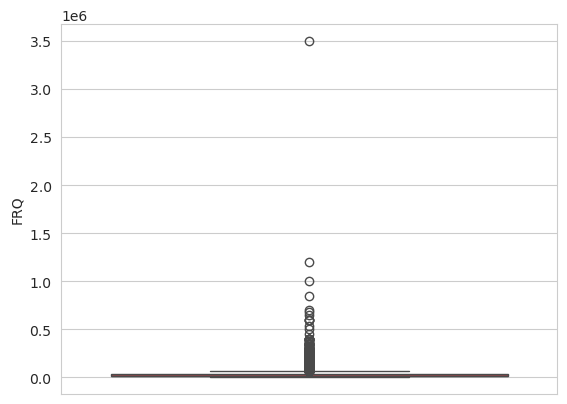

In [1335]:
box_plot(y_axis = "Rent")

In [1336]:
data = data[data['Rent'] < 1200000]

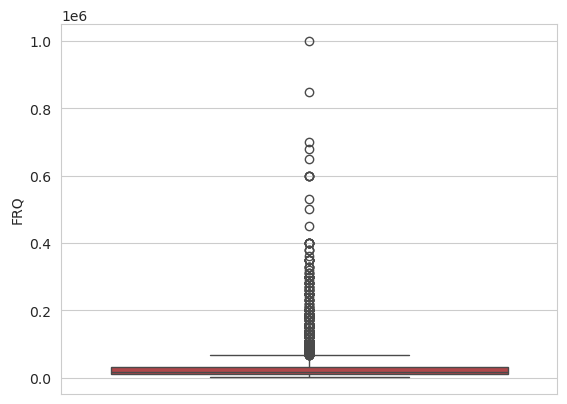

In [1337]:
box_plot(y_axis = "Rent")

In [1338]:
data["Posted On"].unique()

array(['2022-05-18', '2022-05-13', '2022-05-16', '2022-07-04',
       '2022-05-09', '2022-04-29', '2022-06-21', '2022-06-07',
       '2022-06-20', '2022-05-23', '2022-05-14', '2022-05-05',
       '2022-06-01', '2022-05-17', '2022-06-09', '2022-07-02',
       '2022-06-14', '2022-06-15', '2022-05-28', '2022-05-22',
       '2022-06-18', '2022-06-25', '2022-06-22', '2022-05-21',
       '2022-06-26', '2022-06-16', '2022-06-29', '2022-05-10',
       '2022-05-12', '2022-06-03', '2022-05-31', '2022-06-10',
       '2022-06-24', '2022-04-30', '2022-05-27', '2022-06-06',
       '2022-05-20', '2022-05-26', '2022-07-03', '2022-04-23',
       '2022-06-19', '2022-07-06', '2022-06-04', '2022-05-30',
       '2022-06-08', '2022-05-03', '2022-05-07', '2022-06-27',
       '2022-05-15', '2022-04-28', '2022-06-28', '2022-06-23',
       '2022-06-13', '2022-05-04', '2022-04-25', '2022-05-06',
       '2022-06-30', '2022-07-01', '2022-06-17', '2022-06-11',
       '2022-05-11', '2022-06-12', '2022-06-05', '2022-

In [1339]:
data["Posted On"] = pd.to_datetime(data["Posted On"])

In [1340]:
data["Year"] = data["Posted On"].dt.year

data["Month"] = data["Posted On"].dt.month

In [1341]:
def find_seasons(month_number):
    

    
    if month_number in [12, 1, 2]:
        return 1
    
    elif month_number in [3, 4, 5]:
        return 2
    
    elif month_number in [6, 7, 8]:
        return 3
    
    elif month_number in [9, 10, 11]:
        return 4

In [1342]:
data["Season"] = data["Month"].apply(find_seasons)

In [1343]:
data.drop(columns = "Posted On", inplace = True)

In [1344]:
data.sample(3)

,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season
4071,3,22000,3000,3 out of 5,Carpet Area,sri sai arcade madinaguda,Hyderabad,Furnished,Bachelors/Family,2,Contact Owner,2022,7,3
4010,2,15000,900,1 out of 3,Super Area,Santosh Nagar,Hyderabad,Unfurnished,Bachelors/Family,2,Contact Owner,2022,5,2
1786,2,15000,800,1 out of 5,Super Area,whitefield,Bangalore,Unfurnished,Bachelors/Family,2,Contact Owner,2022,7,3


In [1345]:
data["Year"].unique()

array([2022], dtype=int32)

In [1346]:
data["Month"].unique()

array([5, 7, 4, 6], dtype=int32)

In [1347]:
data["Season"].unique()

array([2, 3])

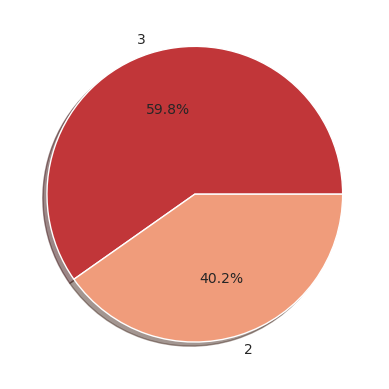

In [1348]:
pie_plot("Season") # call function i create it in cell 11

In [1349]:
data["BHK"].unique()

array([2, 1, 3, 6, 4, 5])

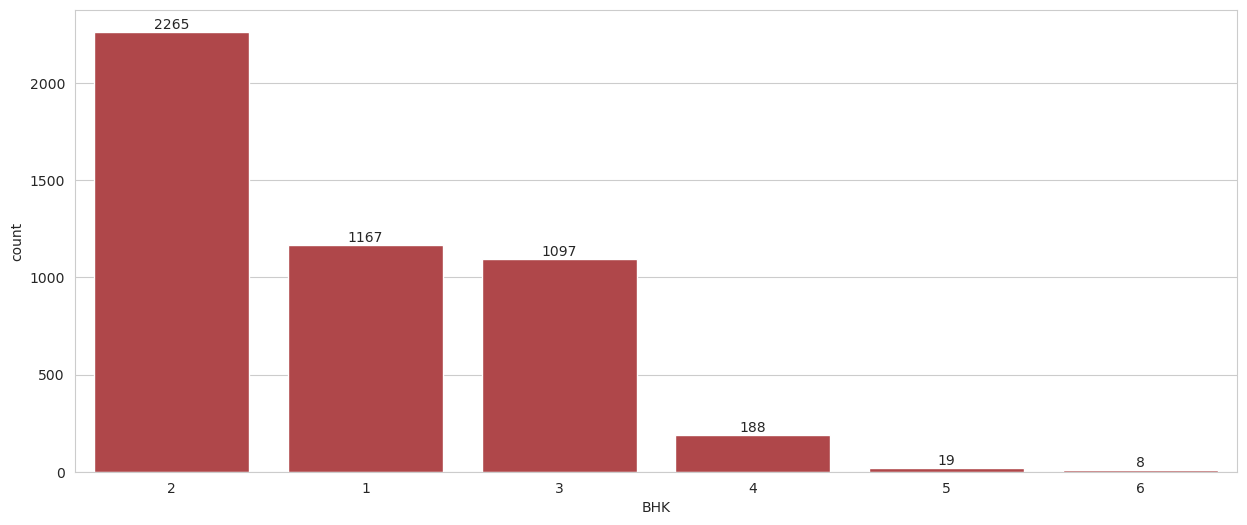

In [1350]:

plt.figure(figsize = (15,6))


count_plot(column_name = "BHK") 

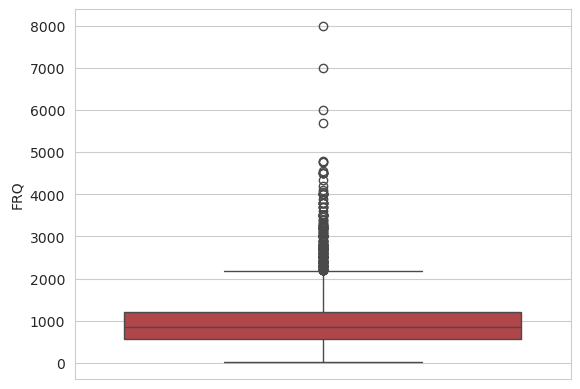

In [1351]:
box_plot(y_axis = "Size")

In [1352]:
data["Floor"].unique()[:50]

array(['Ground out of 2', '1 out of 3', '1 out of 2', 'Ground out of 1',
       'Ground out of 4', '1 out of 4', '1 out of 1', 'Ground out of 3',
       '2 out of 3', '4 out of 5', '2 out of 2', '2 out of 5',
       '4 out of 14', '3 out of 3', '5 out of 5', '4 out of 4',
       '7 out of 8', '2 out of 4', '3 out of 4', '1 out of 5',
       '8 out of 5', 'Ground out of 6', '2 out of 1',
       'Upper Basement out of 4', 'Ground out of 5', '3 out of 5',
       '11 out of 19', '5 out of 10', '11 out of 14',
       'Lower Basement out of 2', '2 out of 7', '4 out of 10',
       '7 out of 10', '2 out of 13', '6 out of 7', '4 out of 7',
       '14 out of 14', '43 out of 78', '2 out of 8', '13 out of 18',
       '5 out of 12', '18 out of 24', '3 out of 7', '17 out of 31',
       '11 out of 21', '7 out of 19', '14 out of 23', '9 out of 20',
       'Upper Basement out of 9', '19 out of 24'], dtype=object)

In [1353]:
def finde_level(sentence):
  
    sentence = sentence.split(" ")
    try:
        return " ".join(sentence[:2]) if sentence[1] == "Basement" else sentence[0]
    except:
        return sentence[0]

In [1354]:
def finde_levels_number(sentence):
  
    sentence = sentence.split(" ")
    return sentence[-1]  if len(sentence) > 1 else "1"

In [1355]:
data["Level"] = data["Floor"].apply(finde_level)

In [1356]:
data["Floors numbers"] = data["Floor"].apply(finde_levels_number)

In [1357]:
data.drop(columns = "Floor", inplace = True)

In [1358]:
data.sample(3)

,BHK,Rent,Size,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Year,Month,Season,Level,Floors numbers
485,3,10000,800,Carpet Area,"Arobindo Pally, Paschim Putiary",Kolkata,Unfurnished,Bachelors,1,Contact Owner,2022,5,2,Ground,2
4130,1,7500,500,Super Area,"Saroornagar, NH 9",Hyderabad,Unfurnished,Bachelors/Family,1,Contact Owner,2022,6,3,1,2
2477,2,9000,450,Carpet Area,Laxmi Nagar,Delhi,Semi-Furnished,Bachelors/Family,1,Contact Agent,2022,5,2,2,4


In [1359]:
data["Level"].unique()

array(['Ground', '1', '2', '4', '3', '5', '7', '8', 'Upper Basement',
       '11', 'Lower Basement', '6', '14', '43', '13', '18', '17', '9',
       '19', '60', '34', '12', '26', '25', '53', '16', '10', '39', '32',
       '47', '28', '20', '15', '65', '40', '37', '22', '21', '30', '35',
       '33', '44', '41', '46', '27', '45', '48', '50', '24', '23', '29',
       '49', '36', '76'], dtype=object)

In [1360]:
data["Level"].replace({"Ground" : 0 , "Lower Basement" : 0, "Upper Basement" : 0},inplace = True)

/tmp/ipykernel_11604/433299338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Level"].replace({"Ground" : 0 , "Lower Basement" : 0, "Upper Basement" : 0},inplace = True)


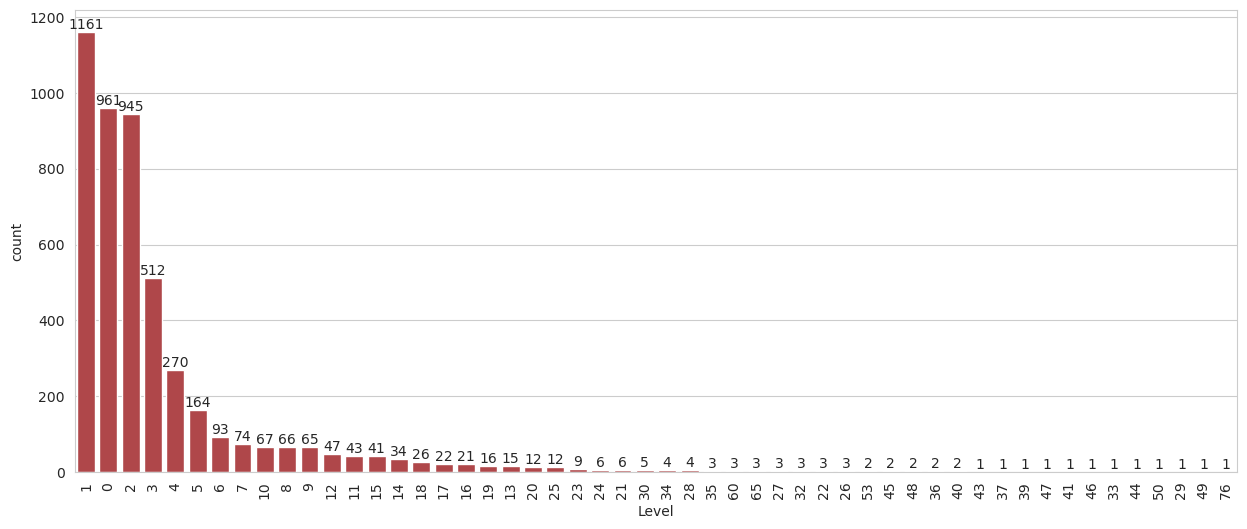

In [1361]:
# first set figure size
plt.figure(figsize = (15,6))

# call function i create it in cell 9
count_plot(column_name = "Level", rotation = 90) 

In [1362]:
data["Floors numbers"].unique()

array(['2', '3', '1', '4', '5', '14', '8', '6', '19', '10', '7', '13',
       '78', '18', '12', '24', '31', '21', '23', '20', '9', '22', '58',
       '16', '66', '48', '40', '44', '42', '41', '60', '32', '30', '29',
       '89', '15', '11', '28', '17', '45', '35', '75', '38', '51', '43',
       '25', '27', '26', '76', '36', '37', '55', '68', '77', '50', '59',
       '62', '39', '52', '54', '33', '46', '85', '71', '81', '34'],
      dtype=object)

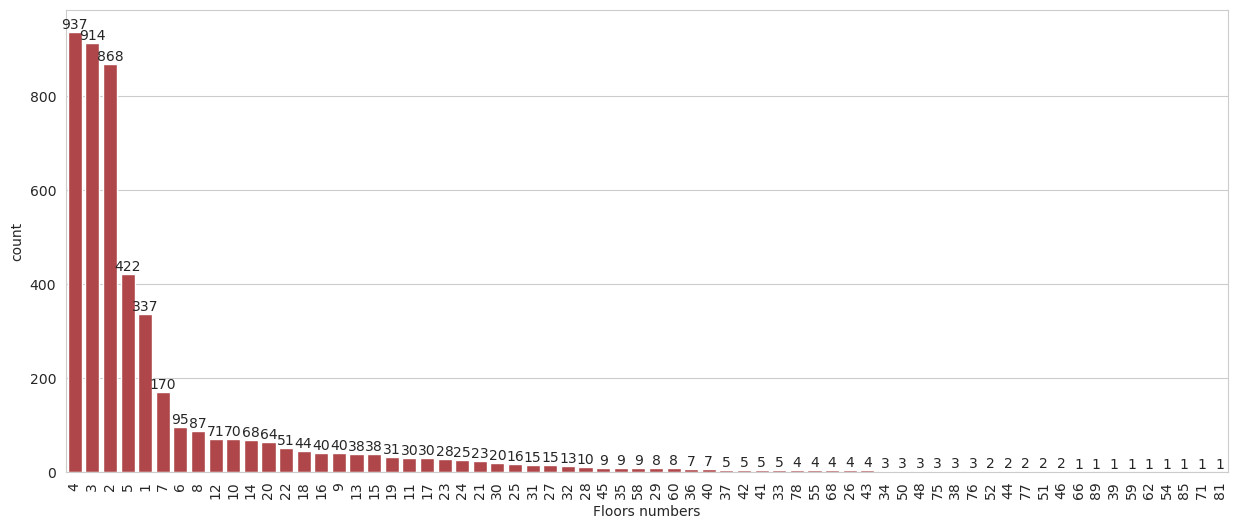

In [1363]:


# first set figure size
plt.figure(figsize = (15,6))


count_plot(column_name = "Floors numbers", rotation = 90) 

In [1364]:
data["Area Type"].unique()

array(['Super Area', 'Carpet Area', 'Built Area'], dtype=object)

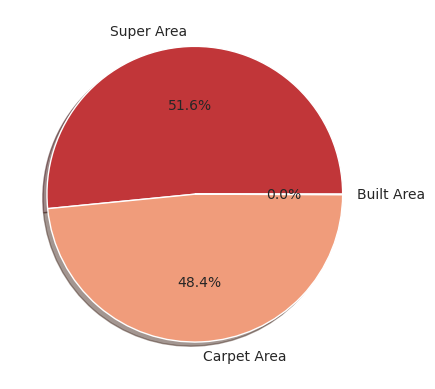

In [1365]:
pie_plot("Area Type") # call function i create it in cell 10

In [1366]:
data["City"].unique()

array(['Kolkata', 'Mumbai', 'Bangalore', 'Delhi', 'Chennai', 'Hyderabad'],
      dtype=object)

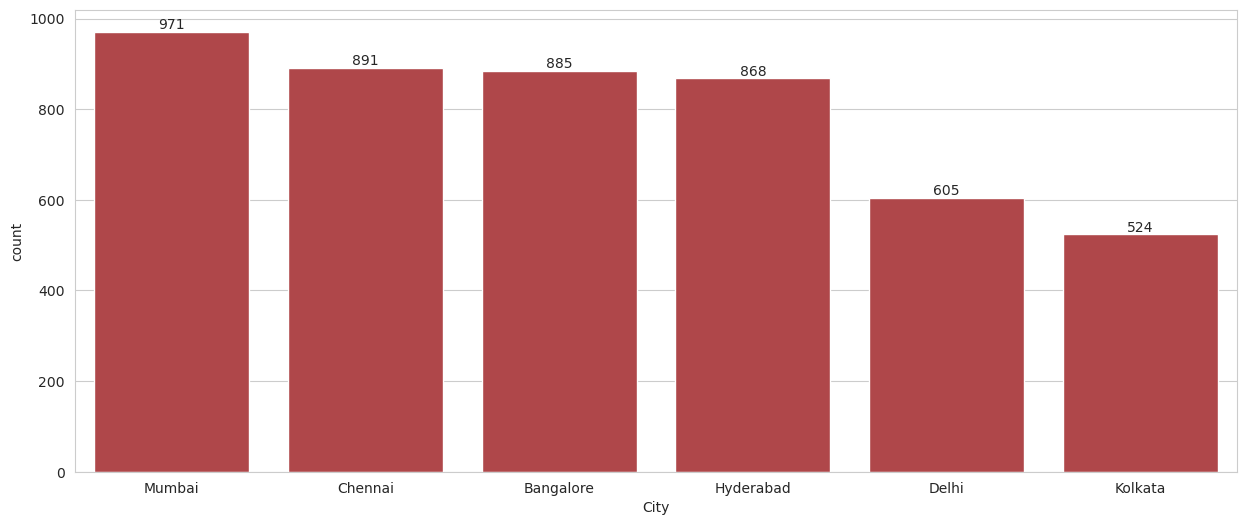

In [1367]:
plt.figure(figsize = (15,6))

# call function i create it in cell 9
count_plot(column_name = "City") 

In [1368]:
data["Furnishing Status"].unique()

array(['Unfurnished', 'Semi-Furnished', 'Furnished'], dtype=object)

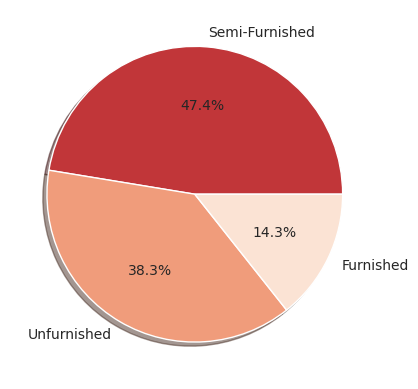

In [1369]:
pie_plot("Furnishing Status") # call function i create it in cell 10

In [1370]:
data["Tenant Preferred"].unique()

array(['Bachelors/Family', 'Bachelors', 'Family'], dtype=object)

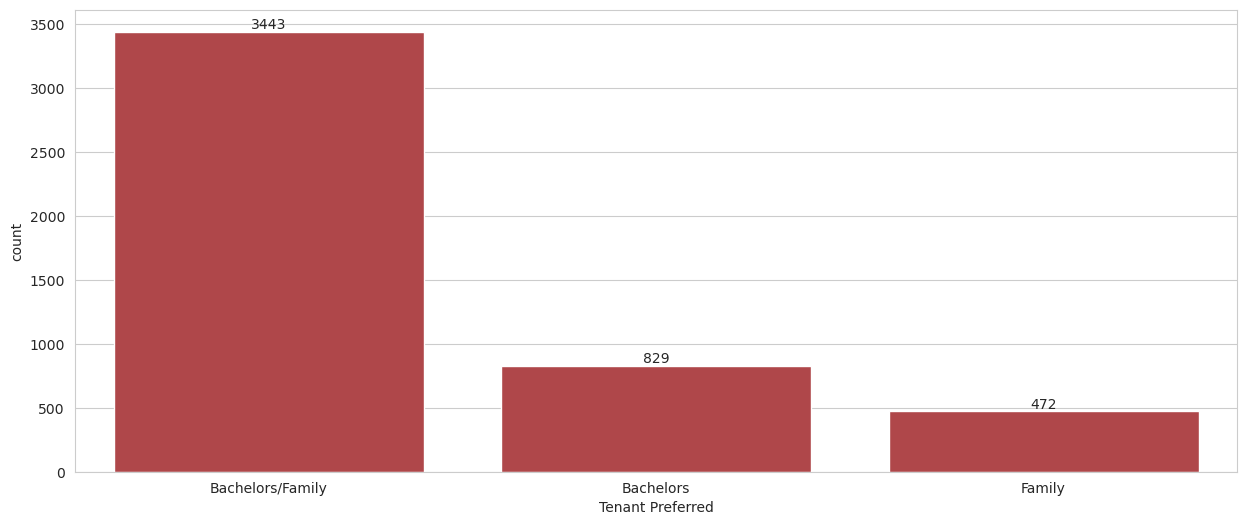

In [1371]:
plt.figure(figsize = (15,6))

# call function i create it in cell 9
count_plot(column_name = "Tenant Preferred")

In [1372]:
data["Bathroom"].unique()

array([ 2,  1,  3,  5,  4,  6,  7, 10])

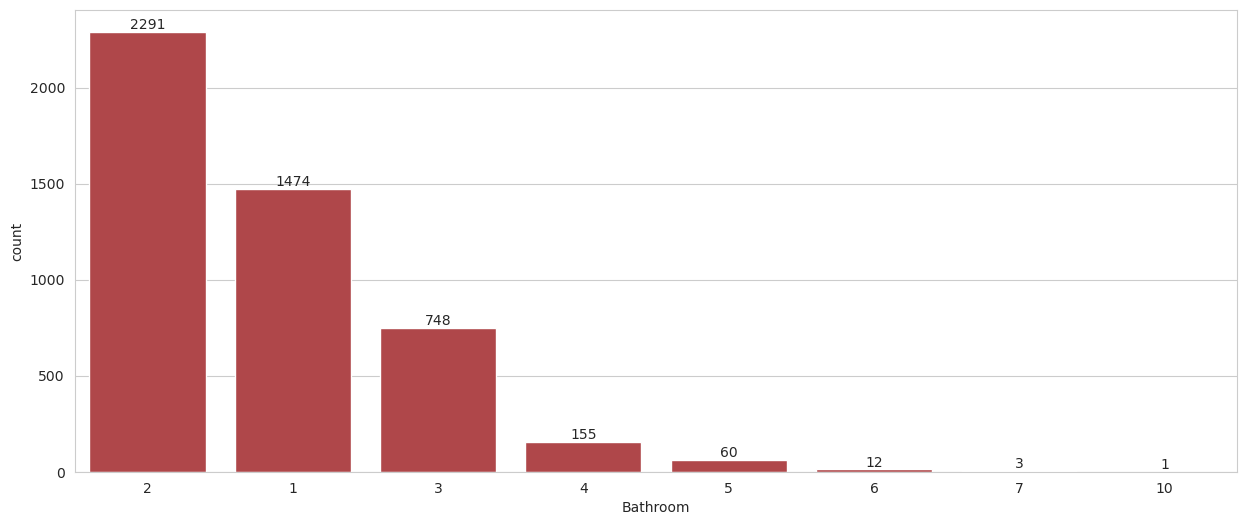

In [1373]:
plt.figure(figsize = (15,6))

# call function i create it in cell 9
count_plot(column_name = "Bathroom") 

In [1374]:
data["Point of Contact"].unique()

array(['Contact Owner', 'Contact Agent', 'Contact Builder'], dtype=object)

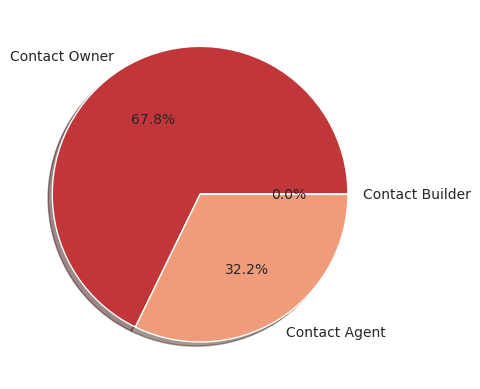

In [1375]:
pie_plot("Point of Contact") # call function i create it in cell 10


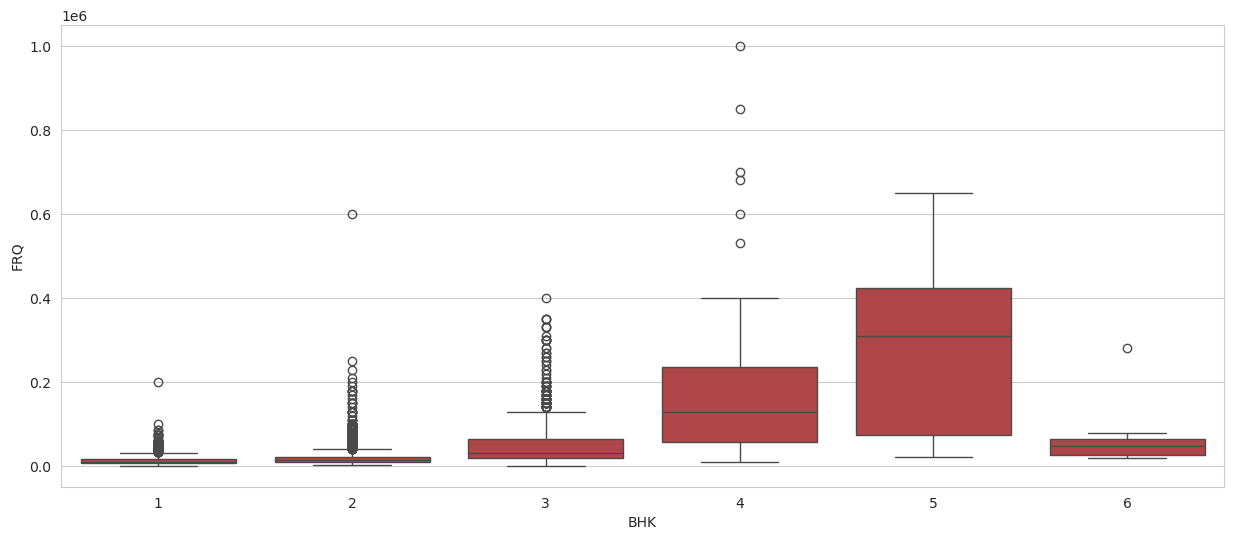

In [1376]:
plt.figure(figsize = (15,6))


box_plot(x_axis = "BHK", y_axis = "Rent")

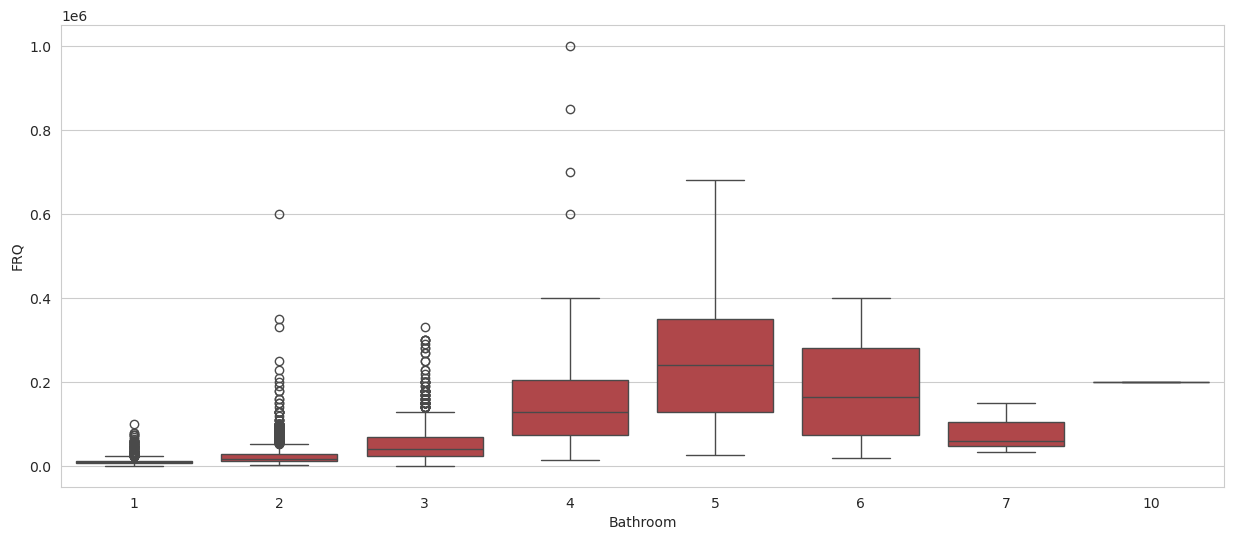

In [1377]:
plt.figure(figsize = (15,6))


box_plot(x_axis = "Bathroom", y_axis = "Rent")

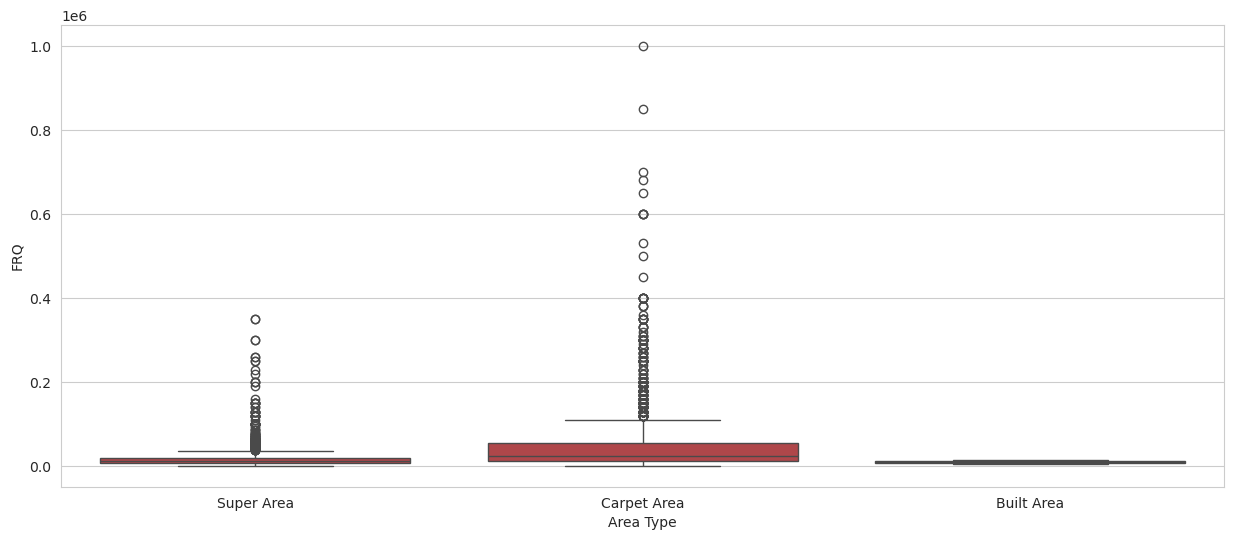

In [1378]:
plt.figure(figsize = (15,6))


box_plot(x_axis = "Area Type", y_axis = "Rent")

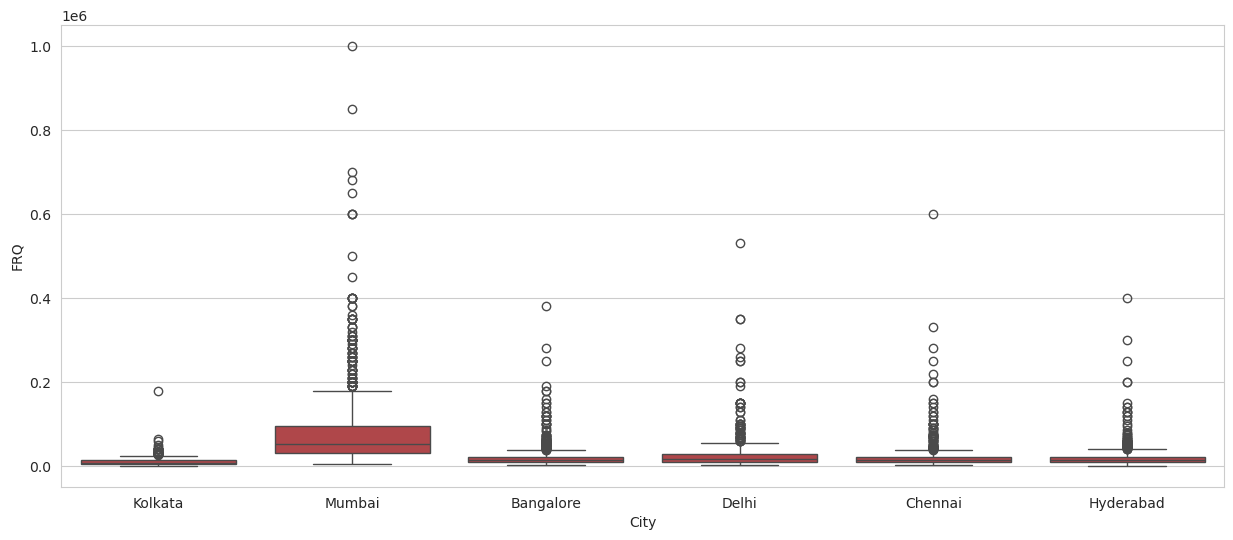

In [1379]:
plt.figure(figsize = (15,6))


box_plot(x_axis = "City", y_axis = "Rent")

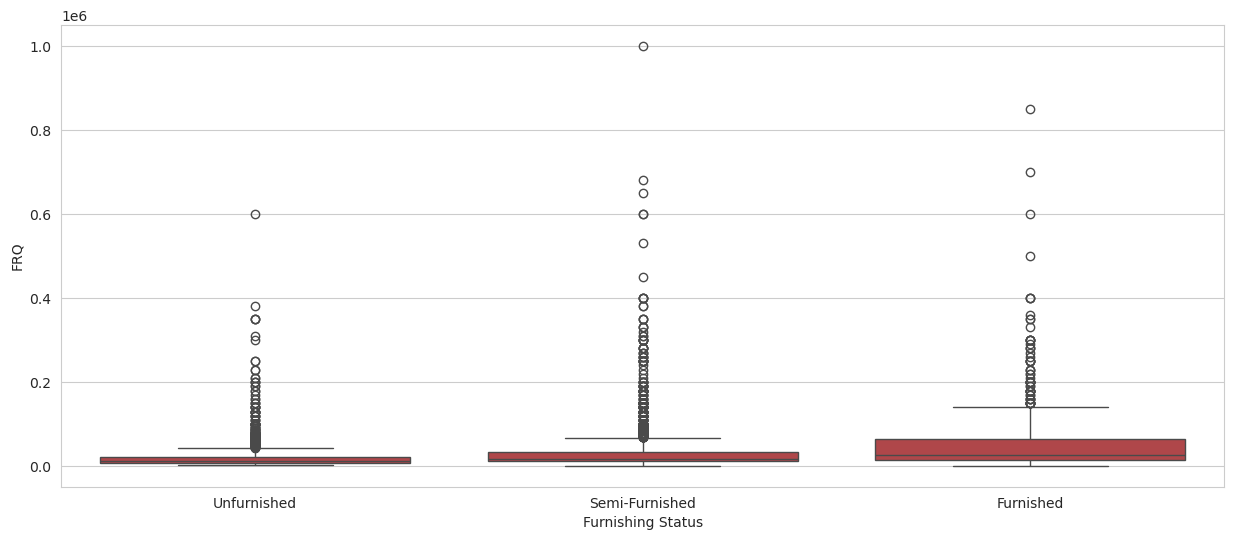

In [1380]:
plt.figure(figsize = (15,6))


box_plot(x_axis = "Furnishing Status", y_axis = "Rent")

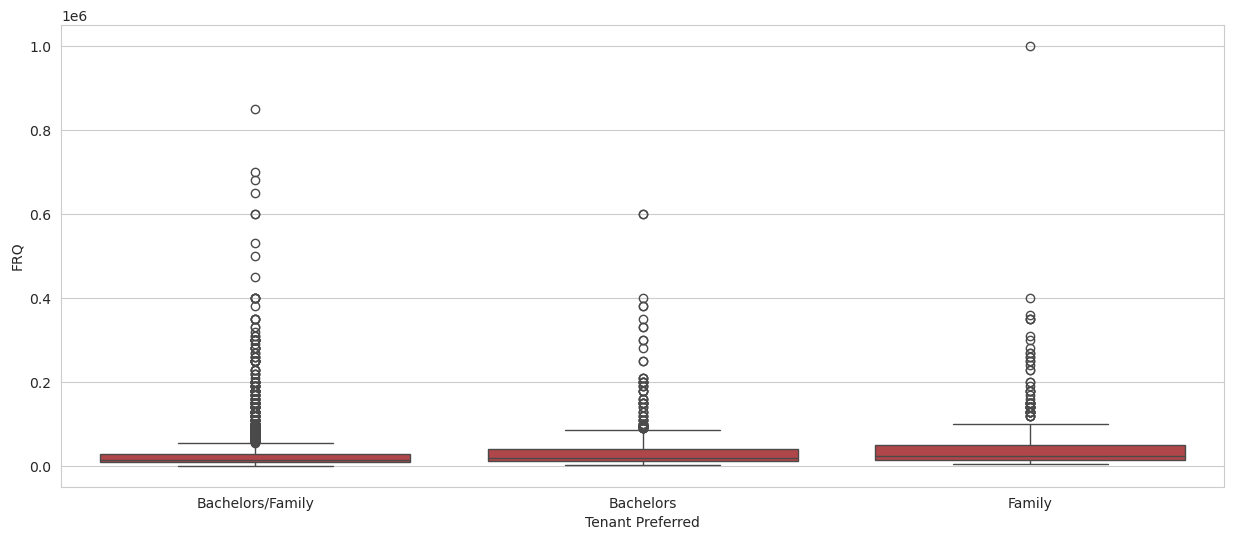

In [1381]:

plt.figure(figsize = (15,6))


box_plot(x_axis = "Tenant Preferred", y_axis = "Rent")

In [1382]:
data.columns

Index(['BHK', 'Rent', 'Size', 'Area Type', 'Area Locality', 'City',
       'Furnishing Status', 'Tenant Preferred', 'Bathroom', 'Point of Contact',
       'Year', 'Month', 'Season', 'Level', 'Floors numbers'],
      dtype='object')

In [1383]:
data["Level"] = data["Level"].astype(int)

data["Floors numbers"] = data["Floors numbers"].astype(int)

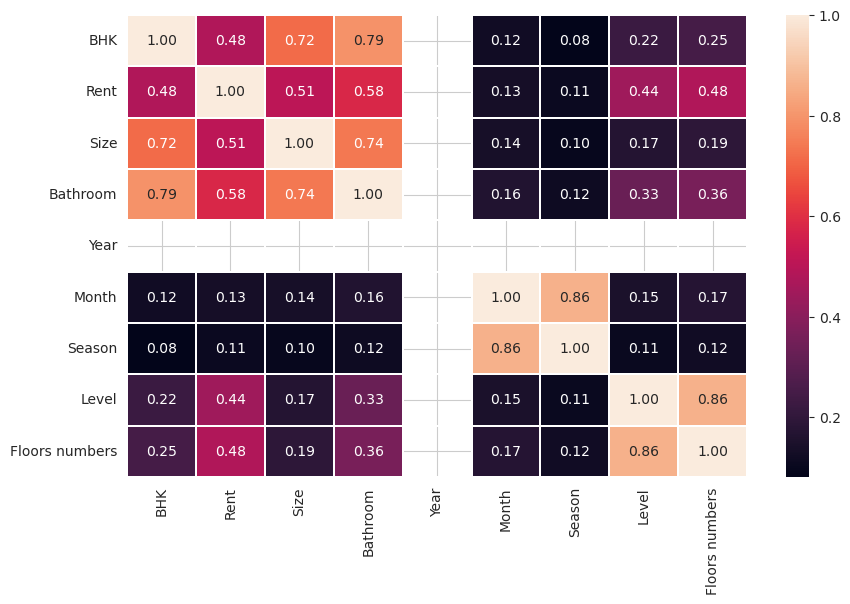

In [1384]:
plt.figure(figsize = (10,6))
sns.heatmap(data.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

In [1385]:
data.drop(columns = ["Year", "Month", "Season", "Area Locality"], inplace = True)

In [1386]:
data.sample(3)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Floors numbers
3195,2,14000,717,Super Area,Chennai,Semi-Furnished,Bachelors/Family,2,Contact Owner,1,3
1894,2,38000,1274,Carpet Area,Bangalore,Semi-Furnished,Bachelors/Family,2,Contact Agent,9,32
3526,1,17000,625,Super Area,Chennai,Semi-Furnished,Bachelors/Family,1,Contact Owner,4,10


In [1387]:
encoder = LabelEncoder()

In [1388]:
for column in data.select_dtypes(include = object).columns.tolist():
    data[column] = encoder.fit_transform(data[column])

In [1389]:
data.sample(3)

,BHK,Rent,Size,Area Type,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact,Level,Floors numbers
650,1,18000,360,1,5,0,1,1,0,3,7
2077,2,10000,850,2,0,2,1,2,2,2,4
1884,2,10000,1200,2,0,1,1,2,2,0,1


In [1390]:
data["Rent"] = np.log10(data["Rent"])

In [1391]:
Target = data["Rent"]
training = data.drop(columns = ["Rent"])

In [1392]:
X_train, X_test, y_train, y_test = train_test_split(training, Target, test_size = 0.3, random_state = 42)

In [1403]:
"""
print("x_train shape: ", X_train.shape)
print("x_test shape: ", X_test.shape)
print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)
"""

'\nprint("x_train shape: ", X_train.shape)\nprint("x_test shape: ", X_test.shape)\nprint("y_train shape: ", y_train.shape)\nprint("y_test shape: ", y_test.shape)\n'

In [1404]:

scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [1405]:

model = xgb.XGBRegressor(
    objective='reg:squarederror',  # regresyon için
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

In [1406]:
scores = cross_val_score(model, training, Target, cv=5, scoring='r2')

In [1407]:
print("Her fold için R2 skorları:", scores)
print("Ortalama R2 skoru:", np.mean(scores))

Her fold için R2 skorları: [0.84569823 0.86548461 0.73358386 0.70817806 0.35730213]
Ortalama R2 skoru: 0.7020493771009222


In [1408]:
model.fit(X_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [1409]:
model.score(X_train, y_train)

0.8934776513289733

In [1410]:
predict = model.predict(X_test)

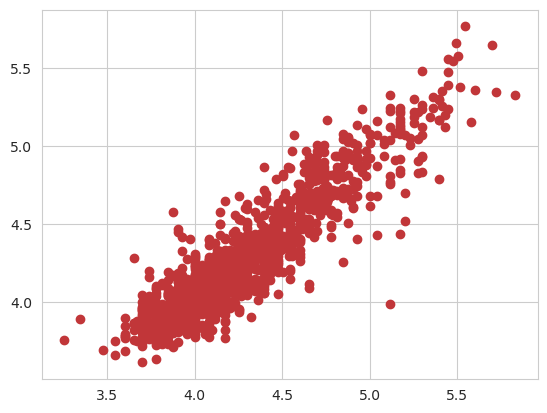

In [1411]:
plt.scatter(y_test, predict)
plt.show()

In [1402]:
mae = mean_absolute_error(y_test, predict)
mse = mean_squared_error(y_test, predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, predict)

print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"Ortalama Karesel Hata (MSE): {mse:.2f}")
print(f"Karesel Ortalamanın Karekökü (RMSE): {rmse:.2f}")
print(f"R-kare (R2): {r2:.2f}")

Ortalama Mutlak Hata (MAE): 0.12
Ortalama Karesel Hata (MSE): 0.03
Karesel Ortalamanın Karekökü (RMSE): 0.16
R-kare (R2): 0.83
